In [3]:
#A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the data
vec1_df = pd.read_excel(r"C:\Users\anany\Downloads\vec1 (1).xlsx")
pre1_df = pd.read_excel(r"C:\Users\anany\Downloads\pre1 (1).xlsx")

# Clean the labels by stripping leading and trailing spaces
y = pre1_df['LABEL'].str.strip()

# Define features (X) and target (y)
X = vec1_df.values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate confusion matrix, precision, recall, and F1-score for both training and test data
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Training Classification Report:\n", train_classification_report)
print("Test Classification Report:\n", test_classification_report)


Training Confusion Matrix:
 [[48  0  3]
 [ 1 35 10]
 [ 3  1 67]]
Test Confusion Matrix:
 [[ 7  4 11]
 [ 2  4 14]
 [ 3  5 22]]
Training Classification Report:
               precision    recall  f1-score   support

      Answer       0.92      0.94      0.93        51
    Question       0.97      0.76      0.85        46
   Statement       0.84      0.94      0.89        71

    accuracy                           0.89       168
   macro avg       0.91      0.88      0.89       168
weighted avg       0.90      0.89      0.89       168

Test Classification Report:
               precision    recall  f1-score   support

      Answer       0.58      0.32      0.41        22
    Question       0.31      0.20      0.24        20
   Statement       0.47      0.73      0.57        30

    accuracy                           0.46        72
   macro avg       0.45      0.42      0.41        72
weighted avg       0.46      0.46      0.43        72



In [4]:
#A2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load the Excel file
file_path = r"C:\Users\anany\Downloads\Lab Session Data (2).xlsx"
data = pd.read_excel(file_path)

# Selecting relevant columns for the analysis
# Assuming "Candies (#)", "Mangoes (Kg)", and "Milk Packets (#)" are features, and "Payment (Rs)" is the target
data_cleaned = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

# Splitting the data into features (X) and target (y)
X = data_cleaned[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = data_cleaned['Payment (Rs)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 5.533385933582265e-26
Root Mean Squared Error (RMSE): 2.352315015805125e-13
Mean Absolute Percentage Error (MAPE): 1.2529022054387628e-15
R-squared (R2) Score: 1.0


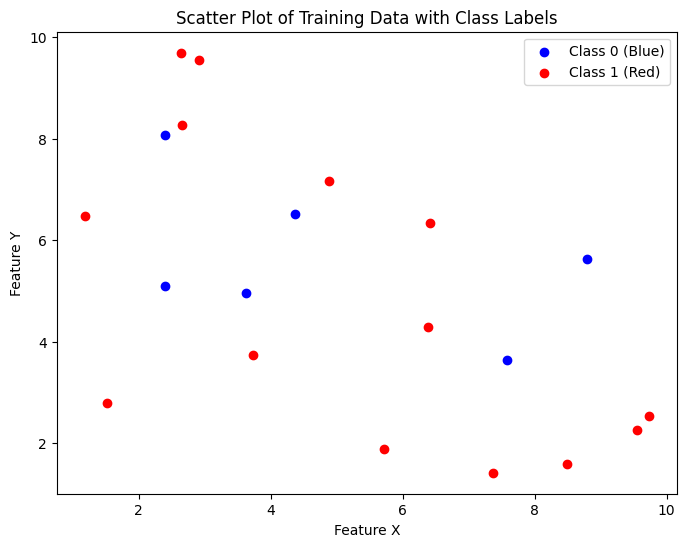

In [5]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 20 random data points with 2 features (X and Y) ranging between 1 and 10
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Step 2: Randomly assign classes to these points (0 or 1)
classes = np.random.choice([0, 1], size=20)

# Step 3: Plot the data points
plt.figure(figsize=(8, 6))

# Plot class 0 (Blue)
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')

# Plot class 1 (Red)
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')

# Label the plot
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data with Class Labels')
plt.legend()

# Show the plot
plt.show()


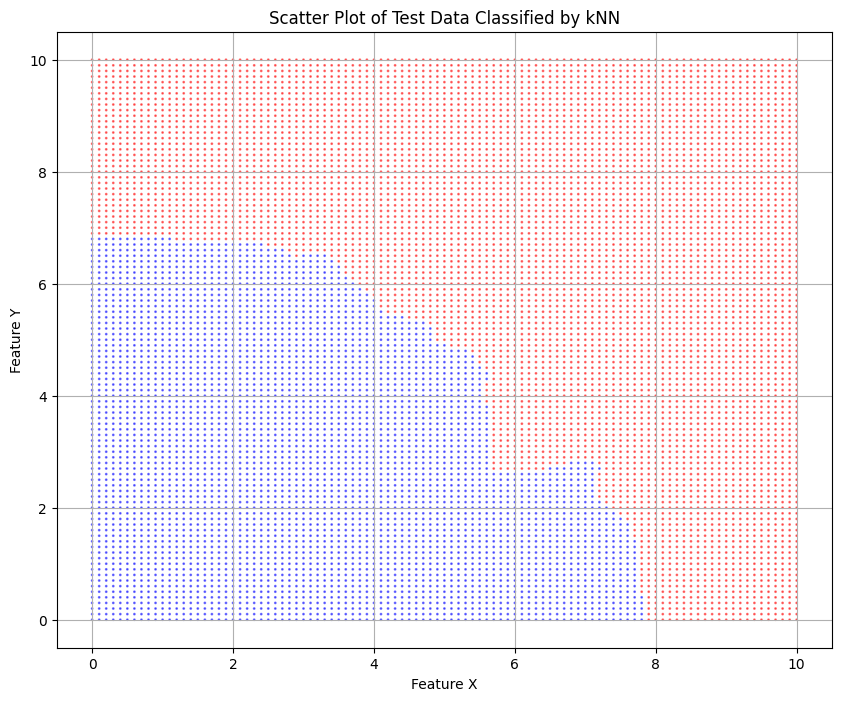

In [12]:
#A4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate the training data again
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
classes_train = np.where(X_train + Y_train > 10, 1, 0)

# Create a DataFrame
df = pd.DataFrame({'X': X_train, 'Y': Y_train, 'Class': classes_train})

# Step 1: Generate the test set data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
x_test, y_test = np.meshgrid(x_test, y_test)
x_test = x_test.ravel()
y_test = y_test.ravel()
test_data = np.c_[x_test, y_test]

# Step 2: Train the kNN classifier using the training data
X_train = df[['X', 'Y']].values
y_train = df['Class'].values

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 3: Classify the test set data
predicted_classes = knn.predict(test_data)

# Step 4: Scatter plot the test data
colors_test = np.where(predicted_classes == 0, 'blue', 'red')

plt.figure(figsize=(10, 8))
plt.scatter(x_test, y_test, c=colors_test, s=1, alpha=0.5)
plt.title('Scatter Plot of Test Data Classified by kNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()


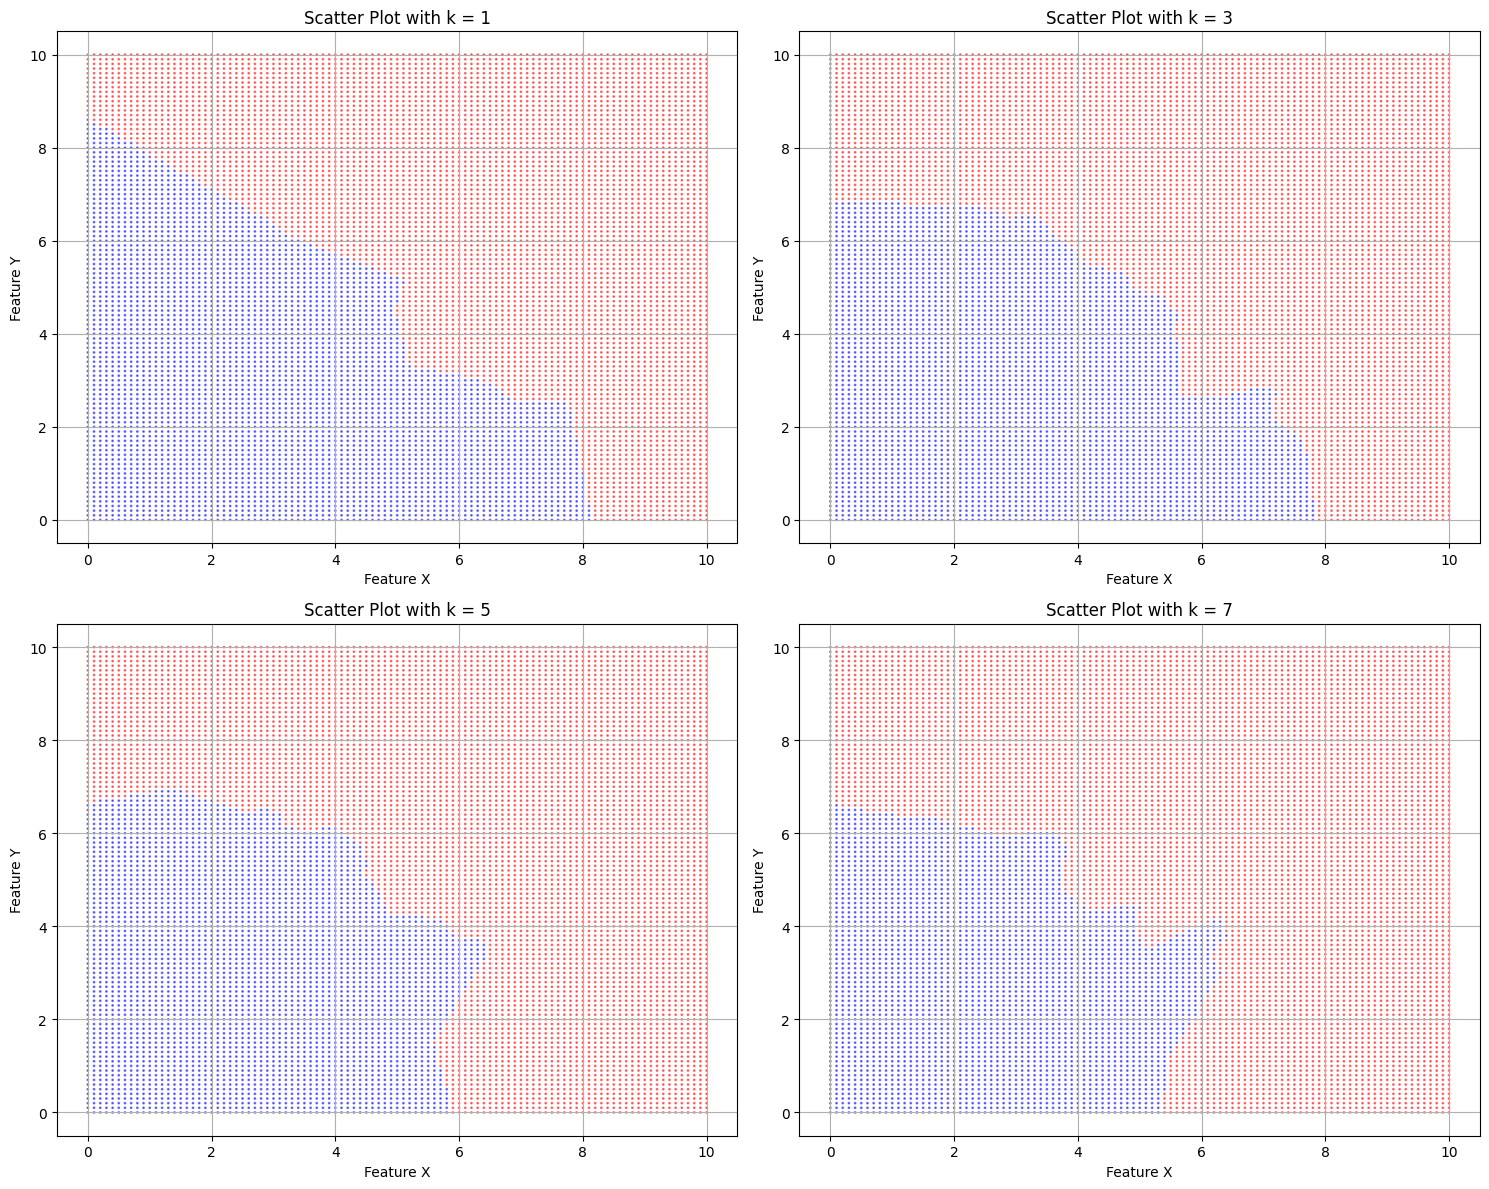

In [13]:
#A5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Re-generate the training data (if needed)
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
classes_train = np.where(X_train + Y_train > 10, 1, 0)

# Create a DataFrame
df = pd.DataFrame({'X': X_train, 'Y': Y_train, 'Class': classes_train})

# Generate the test set data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
x_test, y_test = np.meshgrid(x_test, y_test)
x_test = x_test.ravel()
y_test = y_test.ravel()
test_data = np.c_[x_test, y_test]

# Define the range of k values to test
k_values = [1, 3, 5, 7]

# Set up the figure for multiple subplots
plt.figure(figsize=(15, 12))

for i, k in enumerate(k_values, 1):
    # Train the kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['X', 'Y']].values, df['Class'].values)
    
    # Classify the test set data
    predicted_classes = knn.predict(test_data)
    
    # Scatter plot the test data
    colors_test = np.where(predicted_classes == 0, 'blue', 'red')
    
    # Plotting each subplot
    plt.subplot(2, 2, i)
    plt.scatter(x_test, y_test, c=colors_test, s=1, alpha=0.5)
    plt.title(f'Scatter Plot with k = {k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)

plt.tight_layout()
plt.show()


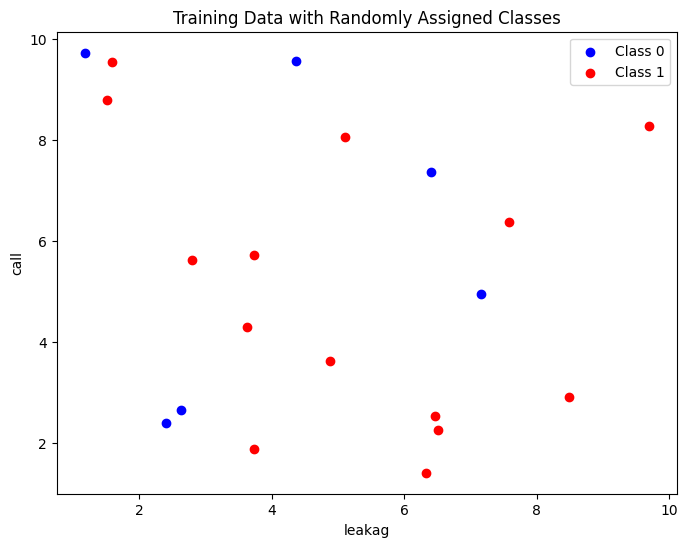

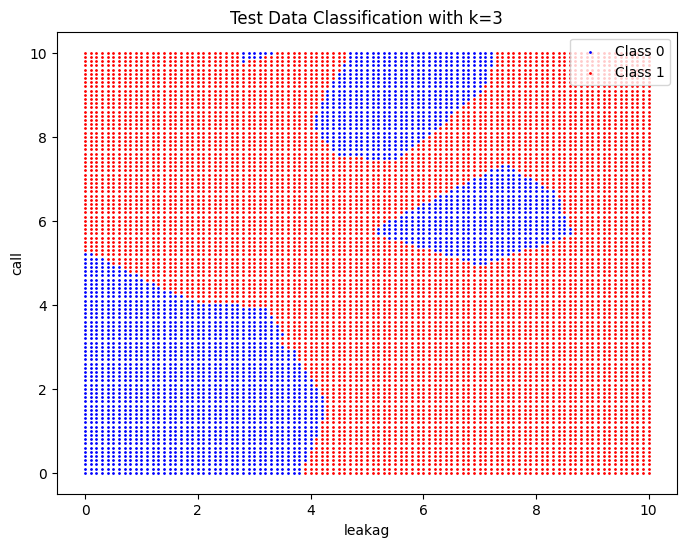

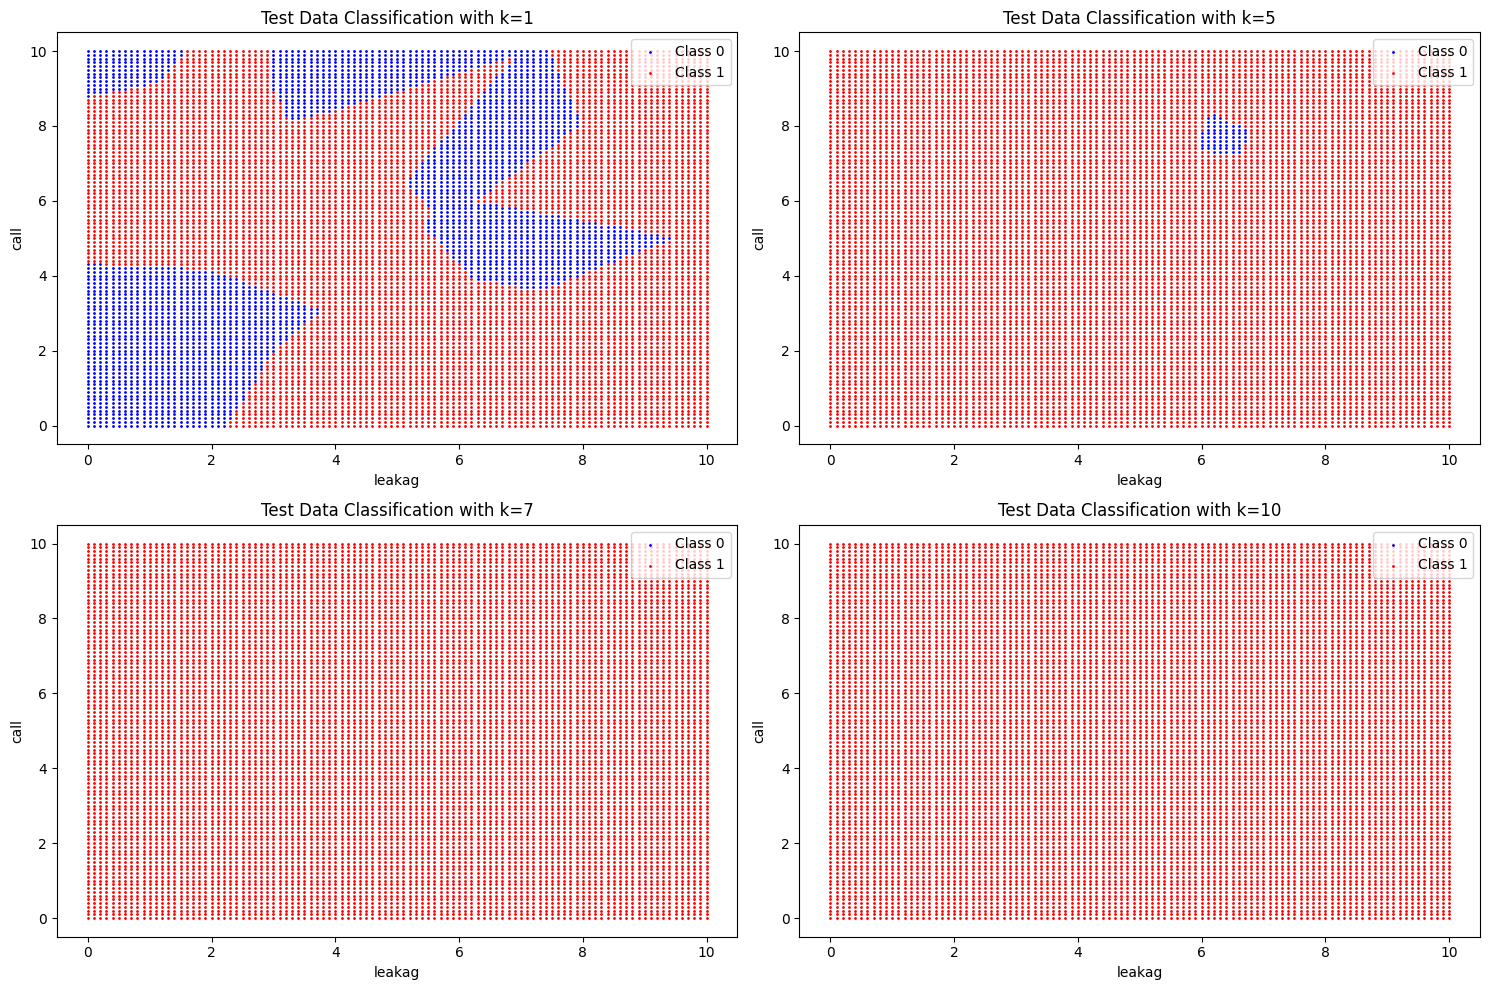

In [1]:
#A6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load the datasets
file_vec = pd.read_excel(r"C:\Users\anany\Downloads\vec1 (1).xlsx")
file_pre = pd.read_excel(r"C:\Users\anany\Downloads\pre1 (1).xlsx")

# Step 2: Select two random features (columns) from vec1.xlsx
np.random.seed(42)  # For reproducibility
random_columns = np.random.choice(file_vec.columns, 2, replace=False)
X_features = file_vec[random_columns].to_numpy()

# Step 3: Generate 20 random data points for training
np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))
y_train = np.random.choice([0, 1], size=20)  # Randomly assigning classes (0: Blue, 1: Red)

# Plotting the training data (Equivalent to A3)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
plt.xlabel(random_columns[0])
plt.ylabel(random_columns[1])
plt.title('Training Data with Randomly Assigned Classes')
plt.legend()
plt.show()

# Step 4: Generate test data with X & Y values varying between 0 and 10 (A4 equivalent)
X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])

# k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

# Plotting the test data classification
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test_pred == 0][:, 0], X_test[y_test_pred == 0][:, 1], color='blue', s=1, label='Class 0')
plt.scatter(X_test[y_test_pred == 1][:, 0], X_test[y_test_pred == 1][:, 1], color='red', s=1, label='Class 1')
plt.xlabel(random_columns[0])
plt.ylabel(random_columns[1])
plt.title('Test Data Classification with k=3')
plt.legend()
plt.show()

# Step 5: Repeat the exercise for various values of k (A5 equivalent)
k_values = [1, 5, 7, 10]

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    
    plt.subplot(2, 2, i)
    plt.scatter(X_test[y_test_pred == 0][:, 0], X_test[y_test_pred == 0][:, 1], color='blue', s=1, label='Class 0')
    plt.scatter(X_test[y_test_pred == 1][:, 0], X_test[y_test_pred == 1][:, 1], color='red', s=1, label='Class 1')
    plt.title(f'Test Data Classification with k={k}')
    plt.xlabel(random_columns[0])
    plt.ylabel(random_columns[1])
    plt.legend()

plt.tight_layout()
plt.show()



In [2]:
#A7
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the datasets from the provided Excel files
vec1_data = pd.read_excel(r"C:\Users\anany\Downloads\vec1 (1).xlsx")
pre1_data = pd.read_excel(r"C:\Users\anany\Downloads\pre1 (1).xlsx")

# Assuming 'LABEL' column in pre1_data is the target
X = vec1_data
y = pre1_data['LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for k
param_grid = {'n_neighbors': range(1, 21)}

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best k
grid_search.fit(X_train, y_train)

# Get the best parameter (k) and the best score from the grid search
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Best k: {best_k}")
print(f"Best cross-validation score: {best_score}")
print("Classification Report:\n", classification_report_output)


C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best k: 18
Best cross-validation score: 0.47682709447415333
Classification Report:
               precision    recall  f1-score   support

      Answer       0.90      0.50      0.64        18
    Question       0.38      0.81      0.52        21
   Statement       0.71      0.38      0.49        32
    Question       0.00      0.00      0.00         1

    accuracy                           0.53        72
   macro avg       0.50      0.42      0.41        72
weighted avg       0.65      0.53      0.53        72



C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati